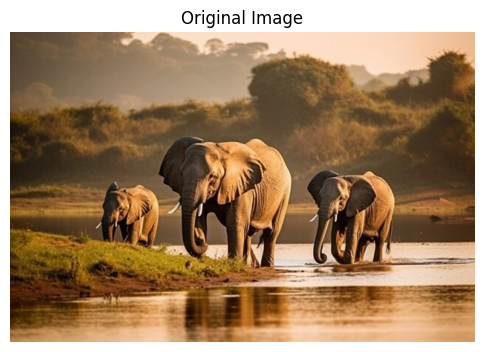

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("assi1img.jpg")  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

# Display Original Image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


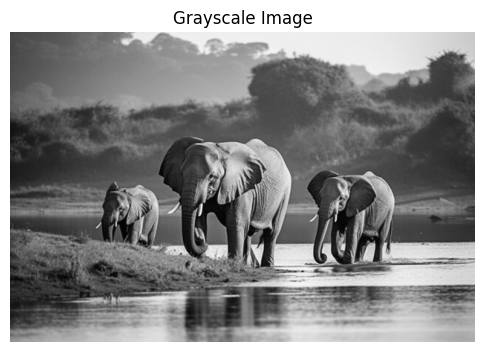

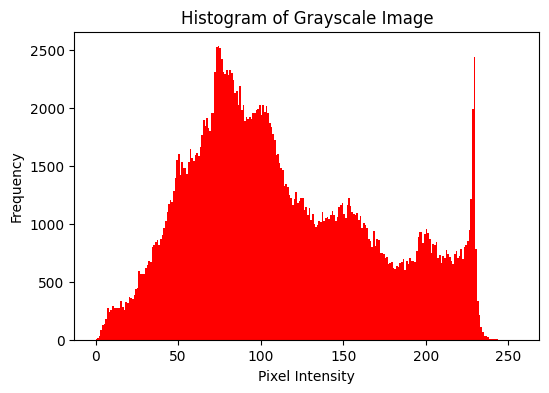

In [6]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display Grayscale Image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Display Histogram
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=[0,256], color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


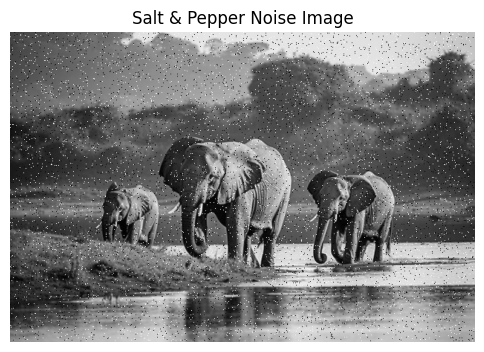

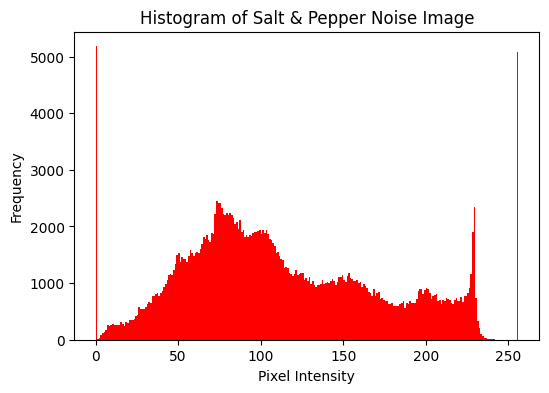

In [10]:
import numpy as np

def salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    # Salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 255
    
    # Pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

# Apply Salt & Pepper Noise
sp_noisy = salt_pepper_noise(gray, 0.02, 0.02)

# Display Image
plt.figure(figsize=(6,6))
plt.imshow(sp_noisy, cmap='gray')
plt.title("Salt & Pepper Noise Image")
plt.axis('off')
plt.show()

# Display Histogram
plt.figure(figsize=(6,4))
plt.hist(sp_noisy.ravel(), bins=256, range=[0,256], color='red')
plt.title("Histogram of Salt & Pepper Noise Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


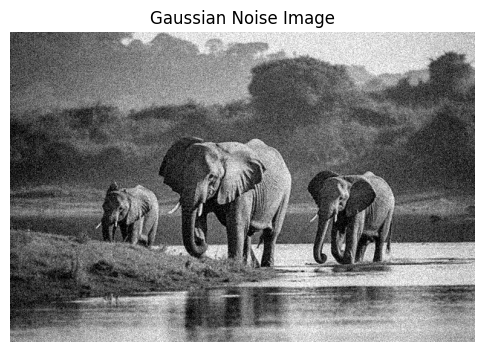

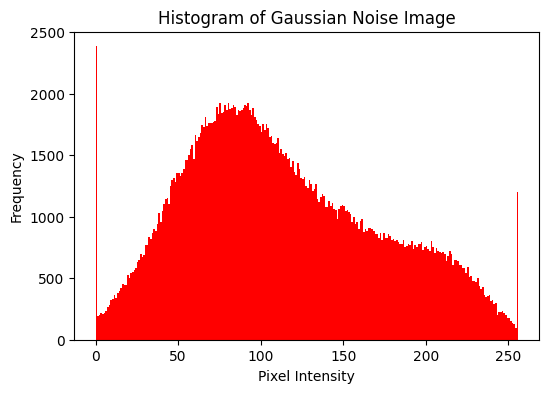

In [12]:
def gaussian_noise(image, mean=0, sigma=20):
    gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)  # Clip to valid range
    return noisy.astype(np.uint8)

# Apply Gaussian Noise
gaussian_noisy = gaussian_noise(gray)

# Display Image
plt.figure(figsize=(6,6))
plt.imshow(gaussian_noisy, cmap='gray')
plt.title("Gaussian Noise Image")
plt.axis('off')
plt.show()

# Display Histogram
plt.figure(figsize=(6,4))
plt.hist(gaussian_noisy.ravel(), bins=256, range=[0,256], color='red')
plt.title("Histogram of Gaussian Noise Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


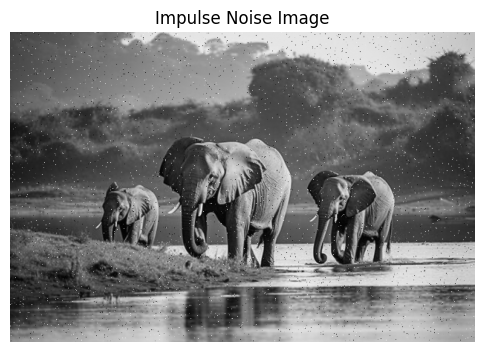

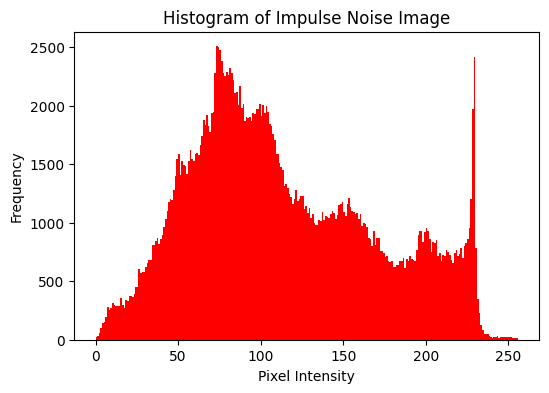

In [14]:
def impulse_noise(image, prob=0.02):
    noisy = np.copy(image)
    num_pixels = int(prob * image.size)
    coords = [np.random.randint(0, i - 1, num_pixels) for i in image.shape]
    noisy[coords[0], coords[1]] = np.random.randint(0, 256, num_pixels)
    return noisy

# Apply Impulse Noise
impulse_noisy = impulse_noise(gray, 0.02)

# Display Image
plt.figure(figsize=(6,6))
plt.imshow(impulse_noisy, cmap='gray')
plt.title("Impulse Noise Image")
plt.axis('off')
plt.show()

# Display Histogram
plt.figure(figsize=(6,4))
plt.hist(impulse_noisy.ravel(), bins=256, range=[0,256], color='red')
plt.title("Histogram of Impulse Noise Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
